# RANDOM MATRICES ANALYSIS

## Import zone

In [1]:
import functions_ranmat as rm

## Exercise 2

In [2]:
N = 5
seed = 12345
verb = True
trim = True

eigval, eigvec = rm.random_herm_spectrum(N, seed, verb)

normalized_spacings = rm.compute_norm_spacing(N, seed, mode='herm')
print(f'Normalized spacings between eigenvalues:\n {normalized_spacings}\n')
normalized_spacings = rm.compute_norm_spacing(N, seed, mode='herm', trim=trim)
print(f'Normalized spacings between eigenvalues (Discarding the first):\n {normalized_spacings}')

Random Hermitian Matrix:
 [[-0.20470766+0.12412128j  1.39340583+0.71354399j  1.00718936-0.56014529j
   0.88642934+2.35941881j -0.53974145-0.28634975j]
 [ 1.39340583-0.71354399j  0.09290788-0.83115354j -1.29622111+1.26593449j
  -2.00163731+0.19954296j  0.47698501-0.37798411j]
 [ 1.00718936+0.56014529j -1.29622111-1.26593449j  0.27499163+0.11982712j
  -0.37184254+1.54199553j  3.24894392+0.75388653j]
 [ 0.88642934-2.35941881j -2.00163731-0.19954296j -0.37184254-1.54199553j
   1.66902531-0.97073591j -1.02122752-0.33128565j]
 [-0.53974145+0.28634975j  0.47698501+0.37798411j  3.24894392-0.75388653j
  -1.02122752+0.33128565j -0.5770873 +1.34974221j]] 

Eigenvalues with corresponding eigenvectors:
    Eigenvalue                                       Eigenvectors
0   -4.892519  [(-0.41683347252250275+0j), (0.373754145341941...
1   -2.787285  [(0.4730234641631622+0j), (-0.1516676174322454...
2    0.738377  [(0.5904946368728285+0j), (0.09961923759261695...
3    2.795161  [(0.37134256897549767+0j)

## Exercise 3

### Random Hermitian matrix

In [3]:
N_matrices = 50
N = 1024
seed = 12345

spac_distr_herm = rm.compute_spacing_distr(N, seed, N_matrices, mode='herm')
spac_distr_herm_trim = rm.compute_spacing_distr(N, seed, N_matrices, mode='herm', trim=True)

In [4]:
params, pcov, rms_error = rm.fitting_distribution(spac_distr_herm, bins=100, p0=[1, 1, 1, 1], verb=True)
params_t, pcov_t, rms_error_t = rm.fitting_distribution(spac_distr_herm_trim, bins=100, p0=[1, 1, 1, 1], verb=True)

BEST PARAMETERS:
 a: 12.8666, alpha: 2.5529, b: -2.7582, beta: 1.3357

COVARIANCE MATRIX:
 [[ 5.56889239e+00  2.39602319e-01 -4.37118653e-01 -1.16034181e-01]
 [ 2.39602319e-01  1.05019317e-02 -1.87774345e-02 -4.90326533e-03]
 [-4.37118653e-01 -1.87774345e-02  3.43298347e-02  9.12548763e-03]
 [-1.16034181e-01 -4.90326533e-03  9.12548763e-03  2.47850336e-03]]

Root Mean Squared Error: 0.0078
BEST PARAMETERS:
 a: 12.6577, alpha: 2.5624, b: -2.7378, beta: 1.3429

COVARIANCE MATRIX:
 [[ 6.48378765e+00  2.85581318e-01 -5.17212447e-01 -1.38668995e-01]
 [ 2.85581318e-01  1.28162473e-02 -2.27444888e-02 -5.99826348e-03]
 [-5.17212447e-01 -2.27444888e-02  4.12813183e-02  1.10834683e-02]
 [-1.38668995e-01 -5.99826348e-03  1.10834683e-02  3.04039545e-03]]

Root Mean Squared Error: 0.0097


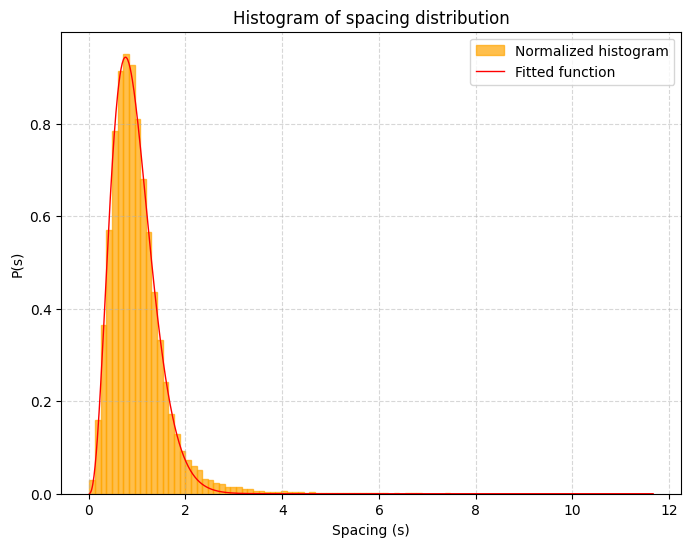

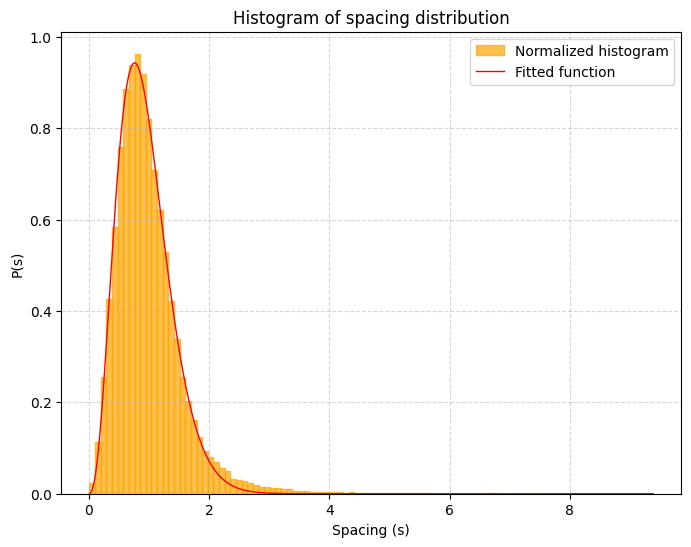

In [5]:
rm.plot_fit(spac_distr_herm, bins=100, p0=[1, 1, 1, 1])
rm.plot_fit(spac_distr_herm_trim, bins=100, p0=[1, 1, 1, 1])

### Random diagonal matrix

In [6]:
N = 5
seed = 12345
verb = True
trim = True

eigval, eigvec = rm.random_diag_spectrum(N, seed, verb)

normalized_spacings = rm.compute_norm_spacing(N, seed, mode='diag')
print(f'Normalized spacings between eigenvalues:\n {normalized_spacings}\n')

normalized_spacings = rm.compute_norm_spacing(N, seed, mode='diag', trim=trim)
print(f'Normalized spacings between eigenvalues (Discarding the first):\n {normalized_spacings}')

Random Diagonal Matrix (real):
 [[-0.20470766  0.          0.          0.          0.        ]
 [ 0.          0.47894334  0.          0.          0.        ]
 [ 0.          0.         -0.51943872  0.          0.        ]
 [ 0.          0.          0.         -0.5557303   0.        ]
 [ 0.          0.          0.          0.          1.96578057]] 

Eigenvalues with corresponding eigenvectors:
    Eigenvalue               Eigenvectors
0   -0.555730  [0.0, 0.0, 1.0, 0.0, 0.0]
1   -0.519439  [0.0, 0.0, 0.0, 1.0, 0.0]
2   -0.204708  [0.0, 1.0, 0.0, 0.0, 0.0]
3    0.478943  [1.0, 0.0, 0.0, 0.0, 0.0]
4    1.965781  [0.0, 0.0, 0.0, 0.0, 1.0] 

Normalized spacings between eigenvalues:
 [0.05757118 0.49927376 1.08451009 2.35864497]

Normalized spacings between eigenvalues (Discarding the first):
 [0.37992348 0.82526037 1.79481615]


In [7]:
N_matrices = 50
N = 1024
seed = 12345

spac_distr_diag = rm.compute_spacing_distr(N, seed, N_matrices, mode='diag')
spac_distr_diag_trim = rm.compute_spacing_distr(N, seed, N_matrices, mode='diag', trim=True)

In [8]:
spac_distr_diag = spac_distr_diag[spac_distr_diag <= 13]
spac_distr_diag_trim = spac_distr_diag_trim[spac_distr_diag_trim <= 13]

In [9]:
params, pcov, rms_error = rm.fitting_distribution(spac_distr_diag, bins=100, p0=[6, 0.5, -3, 0.5], verb=True)
params_t, pcov_t, rms_error_t = rm.fitting_distribution(spac_distr_diag_trim, bins=100, p0=[6, 0.5, -3, 0.5], verb=True)

BEST PARAMETERS:
 a: 6.3831, alpha: 0.2835, b: -3.1709, beta: 0.6109

COVARIANCE MATRIX:
 [[ 9.01573755e-01  3.03847962e-02 -1.42847846e-01 -1.94701208e-02]
 [ 3.03847962e-02  1.02780155e-03 -4.81647846e-03 -6.51687062e-04]
 [-1.42847846e-01 -4.81647846e-03  2.26542416e-02  3.07854180e-03]
 [-1.94701208e-02 -6.51687062e-04  3.07854180e-03  4.27396314e-04]]

Root Mean Squared Error: 0.0039
BEST PARAMETERS:
 a: 4.8255, alpha: 0.2328, b: -2.8598, beta: 0.6436

COVARIANCE MATRIX:
 [[ 0.37928463  0.01758354 -0.07977787 -0.01274022]
 [ 0.01758354  0.00081863 -0.00370002 -0.00058604]
 [-0.07977787 -0.00370002  0.01680009  0.00267372]
 [-0.01274022 -0.00058604  0.00267372  0.00043617]]

Root Mean Squared Error: 0.0039


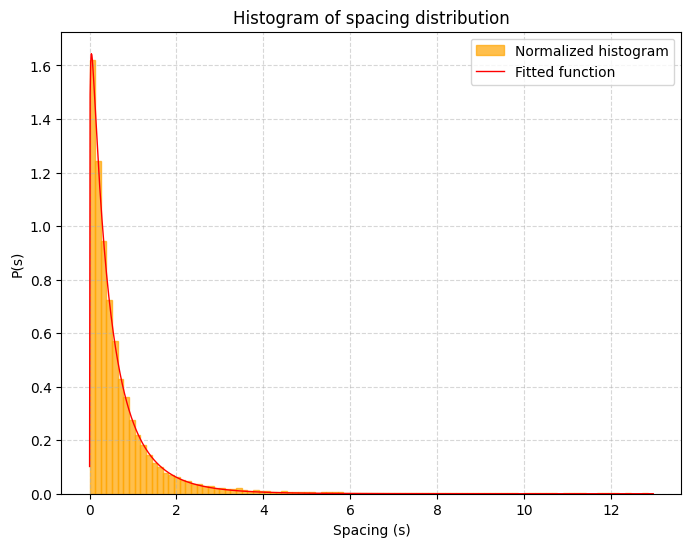

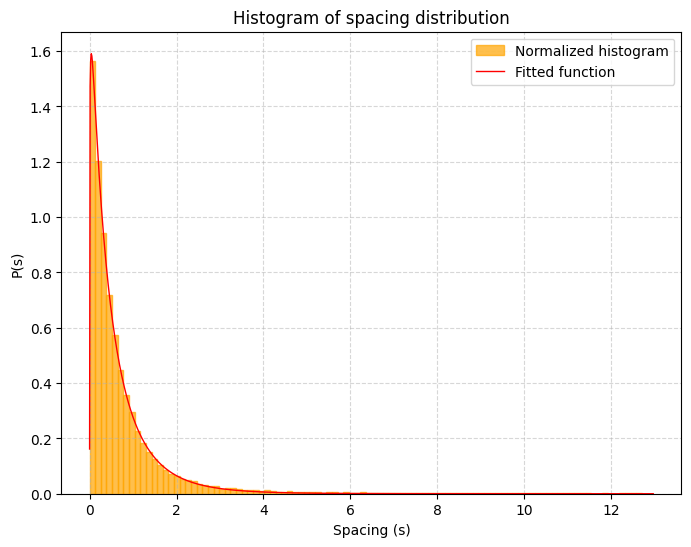

In [10]:
rm.plot_fit(spac_distr_diag, bins=100, p0=[6, 0.5, -3, 0.5])
rm.plot_fit(spac_distr_diag_trim, bins=100, p0=[6, 0.5, -3, 0.5])

### Random Hermitian sparse matrix

In [29]:
N = 10
seed = 12345
density = 0.01
verb = True

eigval, eigvec = rm.random_herm_sparse_spectrum(N, seed, density, verb, sparse=True)
eigval, eigvec = rm.random_herm_sparse_spectrum(N, seed, density, verb, sparse=False)

normalized_spacings = rm.compute_norm_spacing(N, seed, mode='sparse')
print(f'Normalized spacings between eigenvalues:\n {normalized_spacings}\n')

normalized_spacings = rm.compute_norm_spacing(N, seed, mode='sparse', trim=trim)
print(f'Normalized spacings between eigenvalues (Discarding the first):\n {normalized_spacings}')

Random Hermitian Matrix:
   (5, 2)	(0.3163755545817859-0.18391881167709445j)
  (2, 5)	(0.3163755545817859+0.18391881167709445j) 

Eigenvalues with corresponding eigenvectors:
      Eigenvalue                                       Eigenvectors
0  3.659503e-01  [(-1.1102230246251565e-16+1.1102230246251565e-...
1 -1.277444e-17  [(0.32435873077257715-0.3431531855322046j), (-...
2 -3.659503e-01  [(-1.5423710674030525e-17-5.472823679630728e-1...
3 -2.696042e-33  [(-0.6215179660863096-0.05535789135638657j), (...
4  1.595320e-34  [(0.02397230833916708+0.01456048267744927j), (...
5  5.869750e-35  [(-0.05754891254238135+0.1911840542100935j), (...
6 -5.573473e-35  [(-0.05773763588542938-0.2809886253278708j), (...
7 -2.339238e-35  [(-0.08595440894477005+0.08907693164035844j), ... 

Random Hermitian Matrix:
 [[0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.

In [12]:
N_matrices = 50
N = 1024
seed = 12345

spac_distr_diag = rm.compute_spacing_distr(N, seed, N_matrices, mode='sparse')
spac_distr_diag_trim = rm.compute_spacing_distr(N, seed, N_matrices, mode='sparse', trim=True)

In [24]:
params, pcov, rms_error = rm.fitting_distribution(spac_distr_diag, bins=100, p0=[-1, -1.5, -1, -0.5], verb=True)
params_t, pcov_t, rms_error_t = rm.fitting_distribution(spac_distr_diag_trim, bins=100, p0=[6, 0.5, -3, 0.5], verb=True)

BEST PARAMETERS:
 a: -1.0000, alpha: -1.5000, b: -1.0000, beta: -0.5000

COVARIANCE MATRIX:
 [[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]

Root Mean Squared Error: nan
BEST PARAMETERS:
 a: 6.0000, alpha: 0.5000, b: -3.0000, beta: 0.5000

COVARIANCE MATRIX:
 [[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]

Root Mean Squared Error: nan


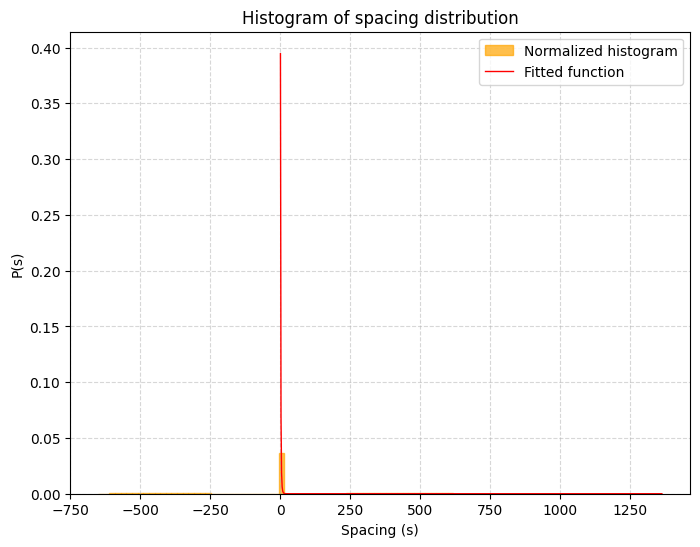

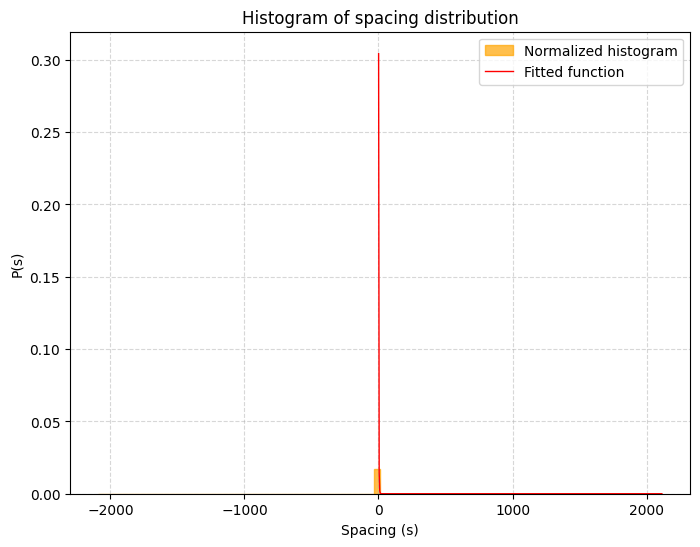

In [25]:
rm.plot_fit(spac_distr_diag, bins=100, p0=[6, 0.5, -3, 0.5])
rm.plot_fit(spac_distr_diag_trim, bins=100, p0=[6, 0.5, -3, 0.5])